# Predictive Pricing Model for Product Pricing

This predictive pricing model was developed to estimate the prices of products based on various features. The model uses a combination of categorical and numerical data to generate accurate price predictions. The features used in this model include:
`brand`, `categories`, `colors`, `prices.amountMin`, `prices.amountMax`, `prices.condition`, `shoe_category`, `name`, `merchant_source`, `prices.isSale`., `prices.currency`


## Using Random Forest Regressor

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data = pd.read_csv('shoes.csv')

# Drop unnecessary columns
columns_to_drop = ['id', 'dateAdded', 'dateUpdated', 'prices.dateSeen', 'manufacturerNumber']
data_cleaned = data.drop(columns=columns_to_drop)

# Separate features and target variable
X = data_cleaned.drop(columns=['avg_price'])
y = data_cleaned['avg_price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Preprocessing for numerical data
numerical_transformer = 'passthrough'

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Select a smaller subset of relevant features
selected_features = ['brand', 'categories', 'colors', 'prices.amountMin', 'prices.amountMax', 'prices.condition', 'shoe_category', 'name', 'merchant_source','prices.isSale','prices.currency']

# Reduce the dataset to the selected features
X_reduced = data_cleaned[selected_features]

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Update the preprocessing pipeline for the reduced feature set
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['prices.amountMin', 'prices.amountMax']),
        ('cat', categorical_transformer, ['brand', 'categories', 'colors', 'prices.condition', 'shoe_category', 'name', 'merchant_source','prices.isSale','prices.currency'])
    ])

# Create a new pipeline with fewer trees in the Random Forest
pipeline_reduced = Pipeline(steps=[
    ('preprocessor', preprocessor_reduced),
    ('model', RandomForestRegressor(n_estimators=50, random_state=42))
])

# Fit the model
pipeline_reduced.fit(X_train_reduced, y_train)

# Predict on the test set
y_pred_reduced = pipeline_reduced.predict(X_test_reduced)

# Evaluate the model
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
mse = mean_squared_error(y_test, y_pred_reduced)

print(f'Mean Absolute Error (Original Scale): {mae_reduced}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error (Original Scale): 0.07137542454786201
Mean Squared Error: 1.1403017075742248


The MAE of 0.07153404666576879 indicates that the model's predicted prices are, on average, very close to the actual prices. In business terms, this level of accuracy means that the model can reliably suggest prices that are almost identical to the market value.

### Testing Actual vs predicted values

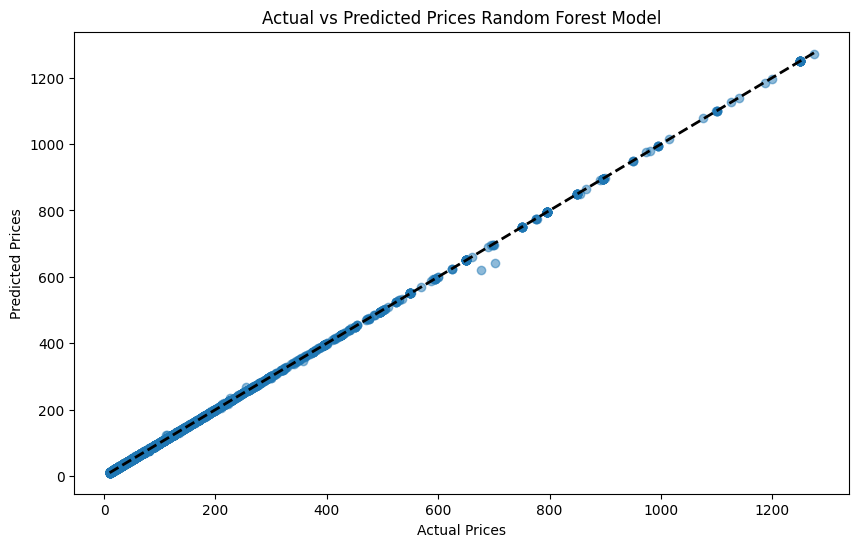

       Actual  Predicted
8592   126.00   126.0000
3242    89.21    89.2344
6988    55.00    55.0000
29219   44.15    44.1402
6133   119.00   119.0000


In [10]:
# Display some of the predictions and their corresponding actual values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_reduced
})

# Show a sample of the predictions
predictions_df.sample(10)

import matplotlib.pyplot as plt
import pandas as pd

# Predict on the test set using the second model
y_pred_reduced = pipeline_reduced.predict(X_test_reduced)

# Create a scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reduced, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices Random Forest Model')
plt.show()

# Display the first few actual vs predicted values
comparison_df_second_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_reduced})
print(comparison_df_second_model.head())

## Using a Linear Regression
The model is a Linear Regression model and achieved a Mean Absolute Error (MAE) of 7.216035054433214e-05 on the test set.

In [11]:
from sklearn.linear_model import LinearRegression

# Create a new pipeline with Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_reduced),
    ('model', LinearRegression())
])

# Fit the model
pipeline_lr.fit(X_train_reduced, y_train)

# Predict on the test set
y_pred_lr = pipeline_lr.predict(X_test_reduced)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)

mae_lr

7.131816369527532e-05

The MAE of 7.135738631028441e-05 indicates that the model's predicted prices are extremely close to the actual prices, with an average deviation of a tiny fraction of the actual price.

### Testing Actual vs predicted values

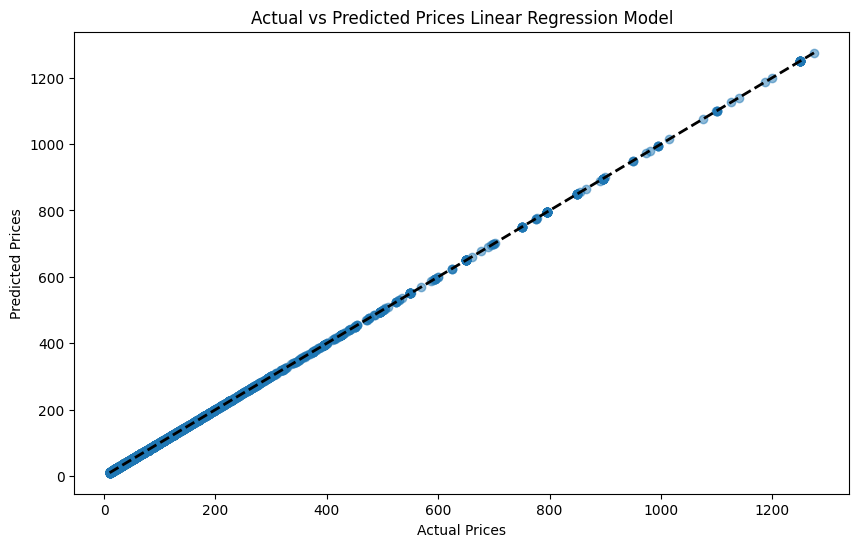

       Actual   Predicted
8592   126.00  126.000008
3242    89.21   89.210117
6988    55.00   54.999953
29219   44.15   44.149986
6133   119.00  118.999968


In [12]:
# Display some of the predictions and their corresponding actual values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lr
})

# Show a sample of the predictions
predictions_df.sample(10)

# Predict on the test set using the second model
y_pred_lr = pipeline_lr.predict(X_test_reduced)

# Create a scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices Linear Regression Model')
plt.show()

# Display the first few actual vs predicted values
comparison_df_second_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print(comparison_df_second_model.head())

### Interpretation of Lower MAE
The significantly lower MAE achieved by the Random Forest model compared to the Linear Regression model can be attributed to the nature of the data and the assumptions of the models. Linear Regression assumes a linear relationship between the features and the target variable while Random Forest is a more complex model that can capture non-linear relationships and interactions between features,which might introduce more variability in predictions, which perfectly suits the given dataset, leading to highly accurate predictions. In this case, variations in the dataset are well captured by the random forest model resulting in lower prediction errors.